<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.883 · Aprendizaje por refuerzo</p>
<p style="margin: 0; text-align:right;">2022-1 · Máster universitario en Ciencia de datos (<i>Data science</i>)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

<div class="alert alert-block alert-info">
    <strong>Nombre y apellidos:</strong> Gerson Villalba Arana
</div>

# PEC 1 - Soluciones tabulares

En esta práctica implementaremos los diferentes métodos de aprendizaje por refuerzo vistos en las partes I y II del curso. En concreto, nos centraremos en la definición de un entorno e implementaremos los diferentes métodos para buscar una solución óptima del problema.

<u>Consideraciones generales</u>: 

- Esta PEC debe realizarse de forma **estrictamente individual**. Cualquier indicio de copia será penalizado con un suspenso (D) para todas las partes implicadas y la posible evaluación negativa de la asignatura de forma íntegra.
- Es necesario que el estudiante indique **todas las fuentes** que ha utilizado para la realización de la PEC. De no ser así, se considerará que el estudiante ha cometido plagio, siendo penalizado con un suspenso (D) y la posible evaluación negativa de la asignatura de forma íntegra.

<u>Formato de la entrega</u>:

- Algunos ejercicios puede suponer varios minutos de ejecución, por lo que la entrega debe hacerse en **formato notebook** y en **formato html**, donde se vea el código, los resultados y comentarios de cada ejercicio. Se puede exportar el notebook a HTML desde el menú File $\to$ Download as $\to$ HTML.
- Existe un tipo de celda especial para albergar texto. Este tipo de celda os será muy útil para responder a las diferentes preguntas teóricas planteadas a lo largo de la actividad. Para cambiar el tipo de celda a este tipo, en el menú: Cell $\to$ Cell Type $\to$ Markdown.

## 0. El entorno __BlackJack__

El entorno __BlackJack__ simula una partida de blackjack, que se juega con una baraja francesa de 52 cartas (baraja de póker), constituída por 4 palos (trébol ♣, corazones ♥, picas ♠, y diamantes ♦) y 13 cartas por palo (As, los números del 2 al 10, J, Q y K).

El objetivo de este juego es obtener cartas cuyo valor numérico sumen el número
mayor posible sin exceder de 21.

Todas aquellas cartas con un valor numérico cuentan como dicho valor numérico,
las figuras (J, Q y K) cuentan como un 10, y el as puede contar como
un 1 (en este caso se denomina as no usable) o como un 11 (en este caso se denomina as usable).

En la siguiente figura puede observarse el valor numérico de todos los tipos de cartas:<br>

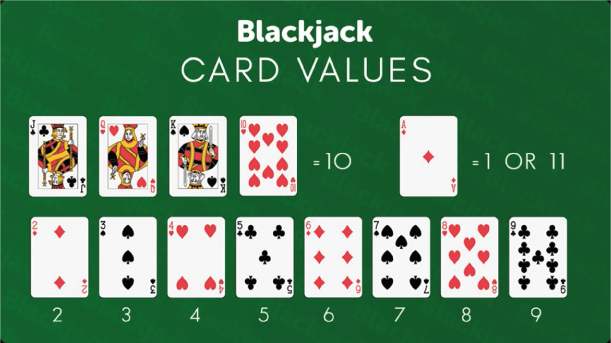

**Figura 1. El juego del Blackjack.** (Fuente: Sutton & Barto, 1998)

Las normas del juego están explicadas en el módulo 5 de la asignatura.

Jugar al blackjack puede ser formulado de forma natural como un MDP finito
y episódico

• Cada partida de blackjack es un episodio.<br>
• Las recompensas son: +1 por ganar, -1 por perder y 0 por empatar.<br>
• El retorno se calcula sin descuento (γ = 1).<br>
• El conjunto de acciones del jugador son pedir carta (hit) o plantarse (stick).
Es decir: A = {hit,stick}.<br>
• Los estados dependen de las cartas del jugador y de la carta que muestra el
crupier.<br>
• El jugador toma decisiones basándose en tres variables:<br>
– Si le ha salido un as que pueda contar como 11 sin pasarse (usable ace en
inglés).<br>
– La suma actual de sus cartas (de 12 a 21).<br>
– El valor de la carta boca arriba del crupier.<br>
• Esto hace un total de 200 estados distintos.<br>

El entorno que utilizaremos inicialmente implementa todas las características comentadas anteriormente y la siguiente política para el crupier:


• Se planta si su suma es 17 o mayor, pide carta en otro caso.


El código para implementar este entorno se encuentra disponible en el fichero adjunto `blackjack_env.py`

Vamos a empezar cargando el entorno y ver qué características tiene, ejecutando un episodio de prueba.

### 0.1. Carga de datos
El siguiente código carga los paquetes necesarios para ejecutar el ejemplo, crea el entorno mediante la instanciación de un objeto de la clase `BlackjackEnv` (importada del archivo adjunto `blackjack_env.py`) e imprime por pantalla la dimensión del espacio de acciones (0=plantarse, 1=pedir carta), del espacio de observaciones (una tupla de 3 elementos: la suma actual del jugador, la carta que muestra el crupier con valores 1-10, donde 1 es un as, y si el jugador tiene o no un as utilizable) y el rango de la variable de recompensa (cuyo valor es -1, 0 o 1 dependiendo de si el jugador pierde, empata o gana la partida y que por tanto va de menos infinito a más infinito).

In [1]:
import numpy as np
import blackjack_env as bj1

env=bj1.BlackjackEnv()
print("Action space is {} ".format(env.action_space))
print("Observation space is {} ".format(env.observation_space))
print("Reward range is {} ".format(env.reward_range))

Action space is Discrete(2) 
Observation space is Tuple(Discrete(32), Discrete(11), Discrete(2)) 
Reward range is (-inf, inf) 


### 0.2. Ejecución de un episodio

A continuación, realizaremos la ejecución de un episodio del entorno `BlackjackEnv` utilizando un agente que selecciona las acciones de forma aleatoria.


In [2]:
# Inicializamos el entorno
obs = env.reset()
t, total_reward, done = 0, 0, False

print("Obs inicial: Player = {}, Dealer = {}, Usable Ace = {} ".format(obs[0],obs[1],obs[2]))

switch_action = {
        0: "Stick",
        1: "Hit",
    }

while not done:
    
    # Elegir una acción aleatoria (ésta es la implementación del agente)
    action = env.action_space.sample()
    
    # Ejecutar la acción y esperar la respuesta del entorno
    new_obs, reward, done, info = env.step(action)
    
    # Imprimir time-step
    print("Action: {} -> Obs: Player = {}, Dealer = {}, Usable Ace = {} and reward: {}".format(switch_action[action], new_obs[0],new_obs[1],new_obs[2], reward))
    
    # Actualizar variables
    obs = new_obs
    total_reward += reward
    t += 1
    
print("Episodio finalizado después de {} pasos y la recompensa fue {} ".format(t, total_reward))
env.close()

Obs inicial: Player = 15, Dealer = 9, Usable Ace = False 
Action: Hit -> Obs: Player = 24, Dealer = 9, Usable Ace = False and reward: -1
Episodio finalizado después de 1 pasos y la recompensa fue -1 


## 1. Análisis y Modificación del entorno (2 puntos)


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 1.1</strong> (0,5 puntos)</div>

Analizar el código del fichero del entorno (fichero adjunto `blacjack_env.py`) y documentar todas las funciones (rellenar los comentarios donde pone `""" Descripción """`).

Guardar el archivo con el mismo nombre `blackjack_env.py`. Este archivo debe entregarse junto a los archivos de este notebook (.ipynb y .html).

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 1.2</strong> (0,5 puntos)</div>

En el juego de Blackjack que se juega en los casinos hay una pequeña diferencia en cuanto a las recompensas: si un jugador gana una partida con un natural (las 2 primeras cartas suman 21) recibe una recompensa de 1,5 puntos.

Una explicación se puede encontrar en el siguiente [enlace](http://www.bicyclecards.com/how-to-play/blackjack/).

Modificar el codigo de BlackjackEnv (fichero adjunto `blacjack_env.py`) para que otorgue una puntuación de 1,5 en caso de que el jugador tenga un natural de mano y el crupier no.

Guardar el entorno modificado en el archivo `blackjack_env_v2.py`, en la misma carpeta que el original. Este archivo debe entregarse junto a los archivos de este notebook (.ipynb y .html) y el entorno original documentado.

In [3]:
import gym
import numpy as np
import blackjack_env_v2 as bj2

env=bj2.BlackjackEnv()
print("Action space is {} ".format(env.action_space))
print("Observation space is {} ".format(env.observation_space))
print("Reward range is {} ".format(env.reward_range))

Action space is Discrete(2) 
Observation space is Tuple(Discrete(32), Discrete(11), Discrete(2)) 
Reward range is (-inf, inf) 


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 1.3</strong> (0,75 puntos)</div>

A continuación, implementar un agente que lleve a cabo la siguiente política determinista: el agente se plantará si obtiene una puntuación de 20 o 21. 

Jugar partidas hasta que el agente gane la partida mediante un natural para comprobar que la implementación es correcta. Mostrar el resultado de esa partida.

In [4]:
# Inicializamos el entorno
obs = env.reset()
t, total_reward, done = 0, 0, False

print("Obs inicial: Player = {}, Dealer = {}, Usable Ace = {} ".format(obs[0],obs[1],obs[2]))

switch_action = {
        0: "Stick",
        1: "Hit",
    }

Obs inicial: Player = 20, Dealer = 6, Usable Ace = False 


In [5]:
######################## SOLUCIÓN ###########################

from itertools import product

def create_states():
    ''' Creates and returns a list of all possible states'''
    player_sum_list = list(range(12,22))
    dealer_list = list(range(1,11))
    usable_ace_list = [True, False]
    return list(product(player_sum_list, dealer_list, usable_ace_list))


def gen_sample_policy():
    '''Generates a sample policy'''
    return {s:s[0]<=19  for s in create_states()}


def play_one_game(env, policy):
    '''Plays one blackjack game'''
    # Inicializamos el entorno
    obs = env.reset()
    t, total_reward, done = 0, 0, False

    # print("Obs inicial: Player = {}, Dealer = {}, Usable Ace = {} ".format(obs[0],obs[1],obs[2]))

    switch_action = {
            0: "Stick",
            1: "Hit",
        }

    while not done:
        # Elegir una acción según la política implementada -> policy
        action = policy[obs]
        # Ejecutar la acción y esperar la respuesta del entorno
        new_obs, reward, done, info = env.step(action)
        # Imprimir time-step
        #print("Action: {} -> Obs: Player = {}, Dealer = {}, Usable Ace = {} and reward: {}".format(switch_action[action], new_obs[0],new_obs[1],new_obs[2], reward))
        # Actualizar variables
        obs = new_obs
        total_reward += reward
        t += 1
    return t, total_reward

Ejecutamos partidas hasta que obtenemos un natural en una de ellas.

In [6]:
t, reward, done = 0, 0, False

# Create the sample policy
sample_policy = gen_sample_policy()

# Play games until a natural is found
while reward != 1.5:
    t, reward = play_one_game(env, sample_policy)
    print(f"Episodio finalizado después de {t} pasos y la recompensa fue de {reward}")

print('Natural found!')

env.close()

Episodio finalizado después de 1 pasos y la recompensa fue de 1
Episodio finalizado después de 3 pasos y la recompensa fue de 1
Episodio finalizado después de 1 pasos y la recompensa fue de -1
Episodio finalizado después de 1 pasos y la recompensa fue de -1
Episodio finalizado después de 2 pasos y la recompensa fue de -1
Episodio finalizado después de 1 pasos y la recompensa fue de 1.5
Natural found!


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 1.4</strong> (0,25 puntos)</div>

Utilizando el agente y el entorno del apartado anterior, simular 100.000 partidas y calcular el retorno del agente (recompensa total acumulada).

Calculad el % de victorias, naturales, derrotas y empates. Comentar los resultados.


In [7]:
# Inicializamos el entorno
obs = env.reset()
total_reward, done = 0, False

print("Obs inicial: Player = {}, Dealer = {}, Usable Ace = {} ".format(obs[0],obs[1],obs[2]))

switch_action = {
        0: "Stick",
        1: "Hit",
    }

Obs inicial: Player = 18, Dealer = 10, Usable Ace = True 


Utilizo la función tqdm para ver el progreso de la ejecución de múltiples episodios.

In [8]:
######################## SOLUCIÓN ###########################
from tqdm.notebook import tqdm


def play_games_natural(env, policy, games):
    '''Plays n games following a specified policy ans returns results'''
    rewards = []
    for _ in tqdm(range(games)):
        rewards.append(play_one_game(env, policy)[1])
    rewards = np.array(rewards)
    total_reward = np.sum(rewards)
    total_losses = np.sum(rewards == -1)
    total_wins = np.sum((rewards == 1) | (rewards == 1.5))
    total_draws = np.sum(rewards == 0)
    total_naturals = np.sum(rewards == 1.5)
    return total_reward, total_wins, total_losses, total_draws, total_naturals

In [9]:
games = 100000
total_reward, total_wins, total_losses, total_draws, total_naturals = play_games_natural(env, sample_policy, games)
print(f"We've played {games} games")
print(f"We've won {total_wins} games -> {total_wins/games:.2%}")
print(f"We've lost {total_losses} games -> {total_losses/games:.2%}")
print(f"We've drawn {total_draws} games -> {total_draws/games:.2%}")
print(f"We've had {total_naturals} naturals -> {total_naturals/games:.2%}")
print(f'The total reward has been {total_reward}')

  0%|          | 0/100000 [00:00<?, ?it/s]

We've played 100000 games
We've won 29920 games -> 29.92%
We've lost 64780 games -> 64.78%
We've drawn 5300 games -> 5.30%
We've had 4771 naturals -> 4.77%
The total reward has been -32474.5


<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>Comentarios:</strong>
<br><br>
Hemos implementado una política determinista y al jugar 100.000 partidaas vemos que tenemos aproximadamente un 30% de partidas ganadas, 65% perdidas y 5% empatadas. Además, tenemos una recompensa total de -32000 aproximadamente por lo que, en media, estamos perdiendo muchas más partidas de las que ganamos. Siguiendo esta política parece claro que no vamos a ganar dinero jugando al blackjack.
</div>


## 2. Política óptima (2 puntos)

Dado que el entorno utilizado en las simulaciones del módulo 5 se ha hecho sin la asiganción extra de 1,5 para el caso de un natural, y con el objetivo de reproducir los mismos resultados, utilizaremos el entorno original proporcionado con el enunciado.

**NOTA IMPORTANTE:** Utilizar el siguiente entorno en el resto de apartados de la PEC

In [10]:
env = bj1.BlackjackEnv()

En el módulo 5 sobre los métodos de Montecarlo se analiza el ejemplo del Blackjack y se resuelve el escenario llegando a la siguiente política óptima:

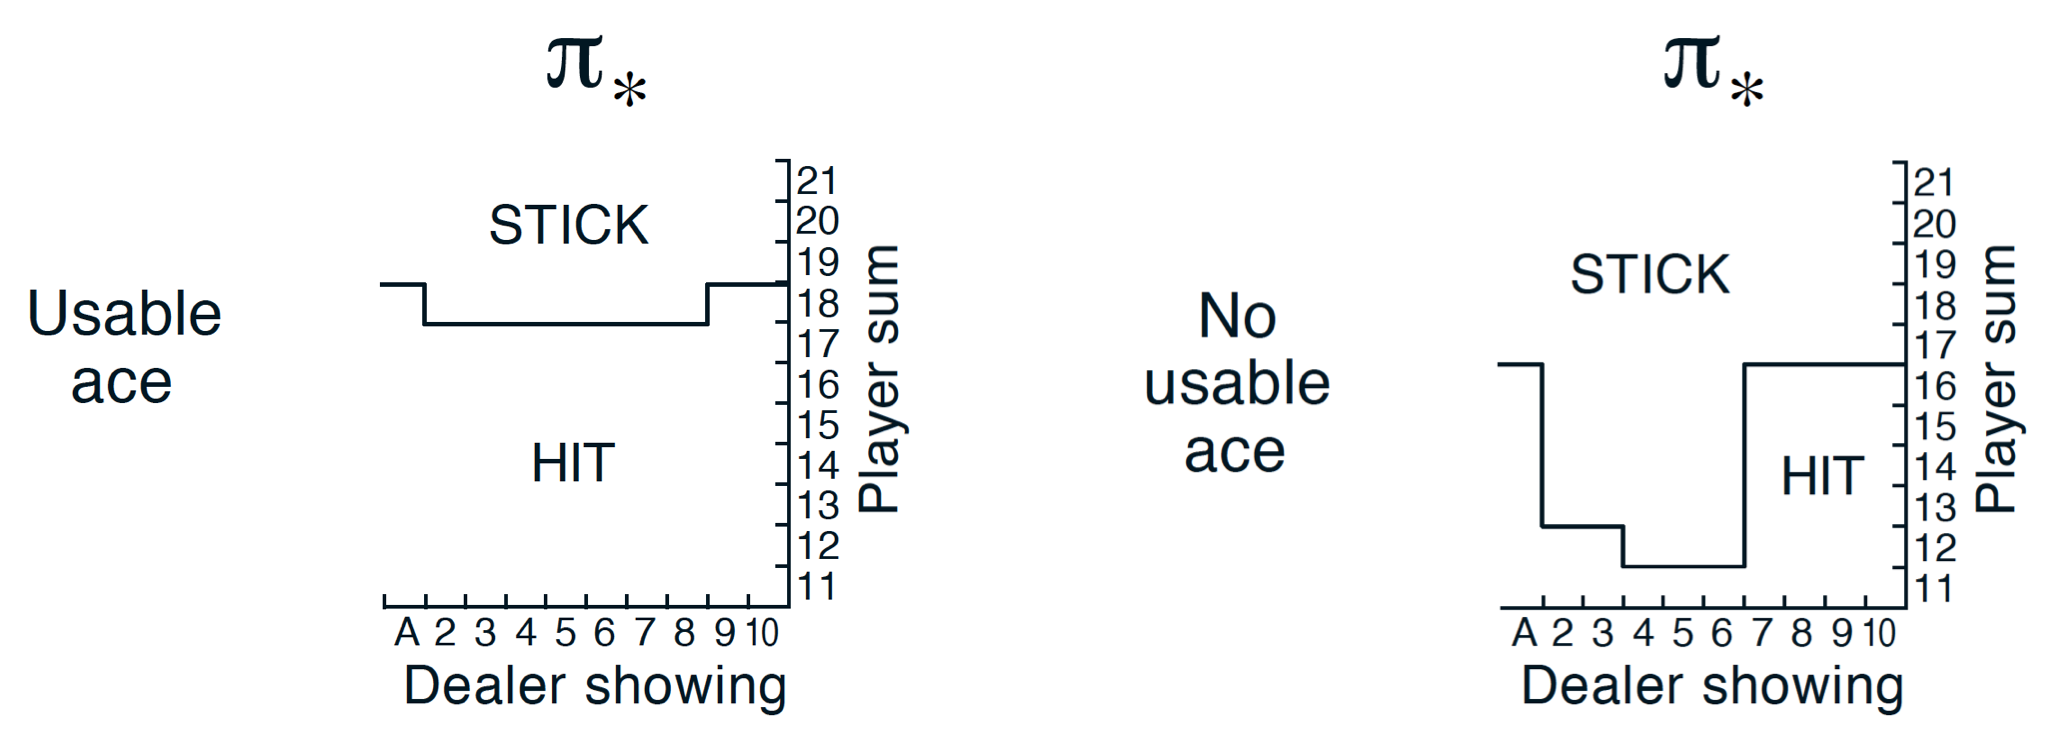

**Figura 2. Políticas óptimas.** Fuente: Sutton & Barto, 2018

A continuación os proporcionamos algunos escenarios de ejemplo extraídos de la figura:

| **Usable Ace** | **Dealer** | **Player_Sum** | **Action** |
|----------------|------------|----------------|------------|
| Yes            | 5          | 17             | HIT        |
| Yes            | 2          | 19             | STICK      |
| Yes            | 9          | 18             | HIT        |
| Yes            | 9          | 20             | STICK      |
| No             | 2          | 5              | HIT        |
| No             | 2          | 14             | STICK      |
| No             | 4          | 11             | HIT        |
| No             | 6          | 12             | STICK      |
| No             | 7          | 5              | HIT        |
| No             | 8          | 17             | STICK      |

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 2.1</strong> (1 punto)</div>

Implementar un agente que ejecute la política óptima definida un poco más arriba. En el caso de la suma de las cartas del jugador sólo es necesario implementar a partir de 12 (incluído), ya que el entorno hace que siempre pida otra carta si está por debajo de ese valor.

In [83]:
# Inicializamos el entorno
env = bj1.BlackjackEnv()
obs = env.reset()
total_reward, done = 0, False

print("Obs inicial: Player = {}, Dealer = {}, Usable Ace = {} ".format(obs[0],obs[1],obs[2]))

switch_action = {
        0: "Stick",
        1: "Hit",
    }

Obs inicial: Player = 20, Dealer = 10, Usable Ace = True 


In [12]:
######################## SOLUCIÓN ###########################

def optimal_policy_func(obs):
    '''Utility fuction to create optimal policy'''
    if obs[2]: # Usable ace
        if obs[1] == 1 or obs[1] >=9: # Dealer showing
            return 1 if obs[0] <= 18 else 0 # Player sum
        else:
            return 1 if obs[0] <= 17 else 0 # Player sum
    else: # No usable ace
        if obs[1] == 1 or obs[1] >=7: # Dealer showing
            return 1 if obs[0] <= 16 else 0 # Player sum
        elif obs[1] in [2, 3]: # Dealer showing
            return 1 if obs[0] <= 12 else 0 # Player sum
        else:
            return 1 if obs[0] <= 11 else 0 # Player sum
        

def gen_optimal_policy():
    '''Generates the proposed optimal policy'''
    return {s:optimal_policy_func(s) for s in create_states()}


optimal_policy = gen_optimal_policy()

Ejecutamos un episodio con esta política para comprobar su correcto funcionamiento.

In [13]:
t, reward = play_one_game(env, optimal_policy)
print(f"Episodio finalizado después de {t} pasos y la recompensa fue de {reward}")

Episodio finalizado después de 1 pasos y la recompensa fue de -1


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 2.2</strong> (0,5 puntos)</div>

Comprobación de resultados. Implementar una función que imprima la política por pantalla para comprobar que el agente implementado ejecuta correctamente la política óptima.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>NOTA:</strong> Tan sólo es necesario verificarlo para los estados de la Figura 2 (Player sum = 12-21, Dealer = 1-10, Usable/No usable ace).</div>

In [14]:
######################## SOLUCIÓN ###########################
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def plot_blackjack_policy(policy):
    '''Plots a policy'''
    policy_df = pd.DataFrame({'player_sum': [i[0] for i in policy.keys()], 
                              'dealer': [i[1] for i in policy.keys()], 
                              'usable_ace': [i[2] for i in policy.keys()],
                              'action': policy.values()
                             })
    colors = ['#B5D6D6', '#19647E']
    fig, axes = plt.subplots(1,2, figsize=(10,4))
    for usable_ace, ax in zip([True, False], axes):
        policy_table = policy_df[policy_df['usable_ace'] == usable_ace].pivot('player_sum', 'dealer', 'action').sort_index(ascending=False)
        sns.heatmap(data=policy_table, cbar=True, linewidths=.5, cmap=colors, ax=ax)
        colorbar = ax.collections[0].colorbar
        colorbar.set_ticks([0.25, 0.75])
        colorbar.set_ticklabels(['Stick', 'Hit'])
        ax.set_title(f'Optimal policy $\pi_*$\n(Usable ace = {usable_ace})', fontsize=14)
        ax.set_xlabel('Dealer showing')
        ax.set_ylabel('Player sum')
        ax.set_aspect('equal')
    plt.tight_layout()
    plt.show()

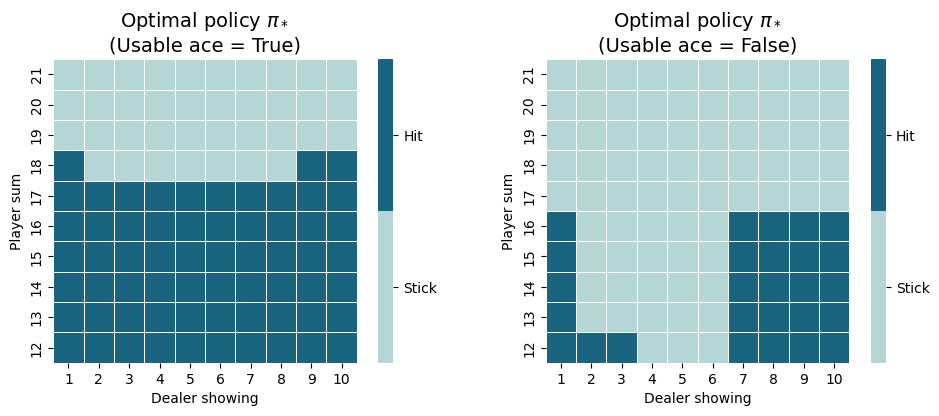

In [15]:
plot_blackjack_policy(optimal_policy)

Ya que tenemos la función para dibujar la política, comprobamos la política arbritaria que hemos probado en primer lugar. 

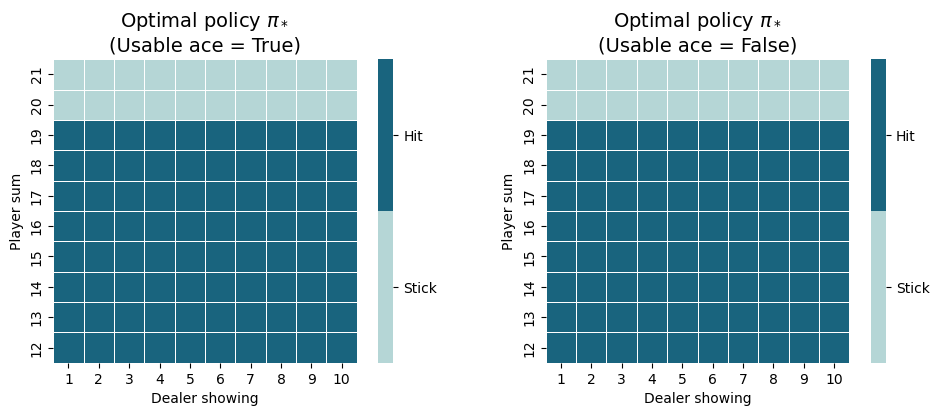

In [16]:
plot_blackjack_policy(sample_policy)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 2.3</strong> (0,5 puntos)</div>

Utilizando el agente y el entorno del apartado anterior, simular 100.000 partidas y calcular el retorno del agente (recompensa total acumulada).

Calculad el % de victorias, derrotas y empates y comentar las diferencias con respecto a la política del apartado 1.

In [17]:
######################## SOLUCIÓN ###########################

def play_games(env, policy, games, pg=True):
    '''Plays n games following a specified policy ans returns results'''
    rewards = []
    for _ in tqdm(range(games), disable=not pg):
        rewards.append(play_one_game(env, policy)[1])
    rewards = np.array(rewards)
    total_reward = np.sum(rewards)
    total_losses = np.sum(rewards == -1)
    total_wins = np.sum(rewards == 1)
    total_draws = np.sum(rewards == 0)
    return total_reward, total_wins, total_losses, total_draws

In [18]:
%%time

def print_test_results(games:int, result:tuple):
    '''Prints results for the tests of n blackjack games'''
    print(f"We've played {games} games")
    print(f"We've won {result[1]} games -> {result[1]/games:.2%}")
    print(f"We've lost {result[2]} games -> {result[2]/games:.2%}")
    print(f"We've drawn {result[3]} games -> {result[3]/games:.2%}")
    print(f'The total reward has been {result[0]}')

    
games = 100000
optimal_results = play_games(env, optimal_policy, games)
print_test_results(games, optimal_results)

  0%|          | 0/100000 [00:00<?, ?it/s]

We've played 100000 games
We've won 43187 games -> 43.19%
We've lost 47328 games -> 47.33%
We've drawn 9485 games -> 9.49%
The total reward has been -4141
CPU times: total: 12 s
Wall time: 11.1 s


<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>Comentarios:</strong>
<br><br>
    
Después de simular un alto número de partidas, puede verse como los resultados con esta política óptima son considerablemente mejores, teniendo aproximadamente un 43% de partidas ganadas y 47% perdidas. La recompensa acumulada a lo largo de todas las partidas es bastante superior a la de antes y es la mejor que deberíamos poder obtener, ya que estamos siguiendo la política óptima, pero sigue siendo negativa, por lo que perderemos dinero en el largo plazo incluso siguiendo esta política óptima.
    
</div>


## 3. Métodos de Montecarlo (2 puntos)

El objetivo de este apartado es realizar una estimación de la política óptima mediante los métodos de Montecarlo, en concreto estudiaremos el algoritmo 2 del módulo 5: *Control mediante métodos MC con exploraciones iniciales*. 

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 3.1</strong> (1 puntos)</div>

Implementar el Algoritmo 2 explicado en el módulo 5 "Métodos de Montecarlo", utilizando los siguientes parámetros:
    
- Número de episodios = 5.000.000
- Factor de descuento = 1

Con el método Montecarlo debemos asegurarnos el paso por todos los pares estado-actión para realizar una estimación de la $q_*$ y $\pi_*$. En este caso, tal y como se nos pide, utilizamos el metodo de exploraciones iniciales, que soluciona este problema generando episodios donde todos los pares estado-acción a evaluar tengan una probabilidad no nula de ser seleccionados para comenzar el episodio (por ejemplo, con una selección aleatoria entre todos los posibles). Este método no es posible en muchos problemas reales, ya que no se puede empezar en cualquier par estado/acción, pero sí que es válido en nuestro caso para simular partidas de Blackjack. 

Además, aplicamos el método first-visit, que implica que sólo tendremos en cuenta la primera visita a un estado a la hora de actualizar la $q$ y $\pi$. De todas formas, en este caso este método es innecesario porque en el blackjack no se puede volver a un estado ya visitado anteriormente, porque supondría desacerse de cartas, algo que no es posible.

El algoritmo que vamos a implementar es el siguiente:

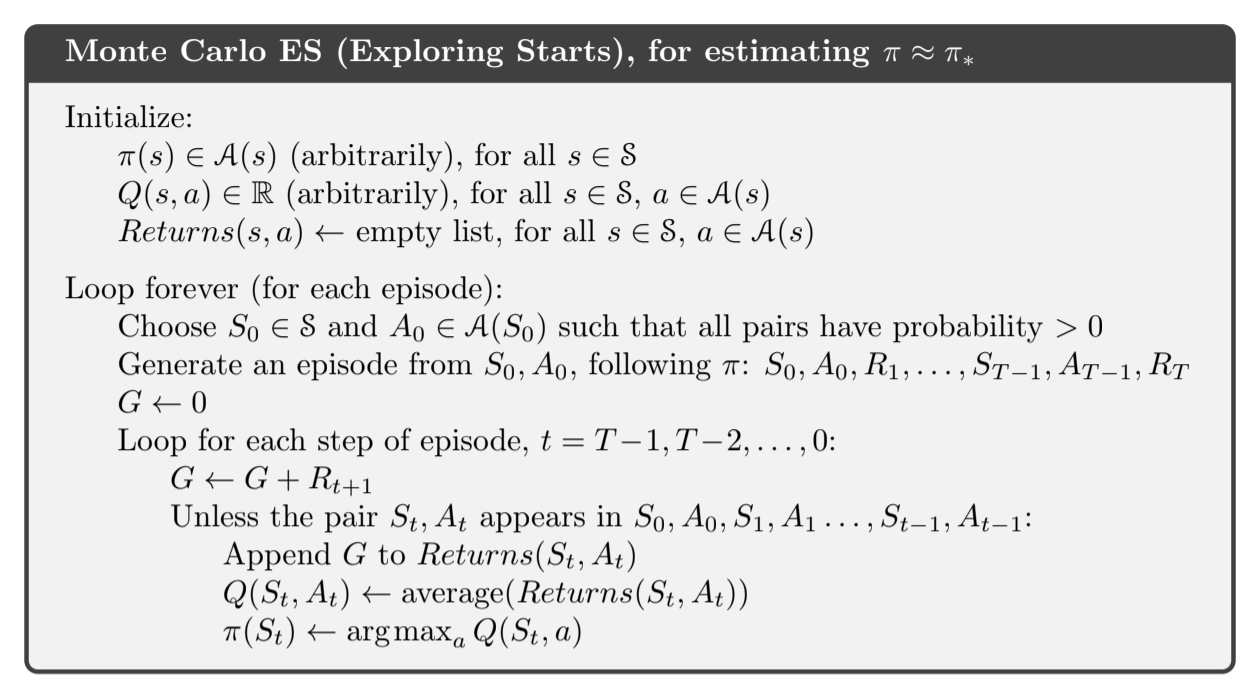

In [84]:
def gen_random_policy(env):
    '''Generates a random policy'''
    return {s:env.action_space.sample() for s in create_states()}


def generate_episode_es(env, policy) -> list:
    '''Generates an episode following a specified policy with exploring starts'''
    state = env.reset()
    episode = []
    done = False
    first_action = True
    
    # Continue with next steps
    while not done:
        # If it is the first step of the episode, select a random action 
        if first_action:
            action = env.action_space.sample()
            first_action = False
        # Otherwhise, select action according to the policy
        else: 
            action = policy[state]
        # Episode's step
        next_state, reward, done, _ = env.step(action)
        # Save current step in list
        episode.append((state, action, reward))
        # Update state
        state = next_state
    return episode

Comprobamos la creación de episodios de forma correcta.

In [87]:
print('We generate 5 episodes:')
for _ in range(5):
    print(generate_episode_es(env, optimal_policy))

We generate 5 episodes:
[((18, 6, False), 1, -1)]
[((13, 8, False), 1, 0), ((18, 8, False), 0, 0)]
[((13, 5, False), 1, -1)]
[((19, 10, False), 1, -1)]
[((20, 10, False), 0, 0)]


In [88]:
from collections import defaultdict


def montecarlo_control_es(env, gamma, n_episodes, pg=True):
    '''Generates the optimal policy and optimal state/action value function via Montecarlo with exploring starts'''
    # Initialize pi, Q, returns
    policy = gen_random_policy(env)
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    returns = {}
    for ep in tqdm(range(n_episodes), disable=not pg):
        # Generate new episode with exploring starts (random initial state/action pair for the episode)
        episode = generate_episode_es(env, policy)
        G = 0
        visited_state = set()
        # Loop over the episode's tuples
        for i, (state, action, reward) in enumerate(episode):
            # Accumulate the reward discounted by gamma
            G += gamma**(i) * reward
            if (state, action) not in visited_state:
                # Get the accumulated reward and number of visits to the state/action pair
                # If it does not exists, return 0,0
                cum_reward, cum_visits = returns.get((state, action), [0, 0])
                # Update the returns dictionary
                returns[(state, action)] = [cum_reward+G, cum_visits+1]
                # Update state/action value function
                Q[state][action] = (cum_reward + G) / (cum_visits + 1)
                # Update policy -> greedy update with argmax
                policy[state] = np.argmax(Q[state])
                # Add to visited states
                visited_state.add((state, action))
    return Q, policy

Ejecutamos el algoritmo Montecarlo con el número de episodios especificado.

In [89]:
%%time

gamma = 1
n_episodes = 5_000_000
mc_Q, mc_policy = montecarlo_control_es(env, gamma, n_episodes)

  0%|          | 0/5000000 [00:00<?, ?it/s]

CPU times: total: 11min 39s
Wall time: 10min 43s


Podemos también obtener la función de valor a partir de la q obtenida siguiendo esta política encontrada. Lo hacemos para representar visulamente su valor y poder compararlo con el de la teoría.

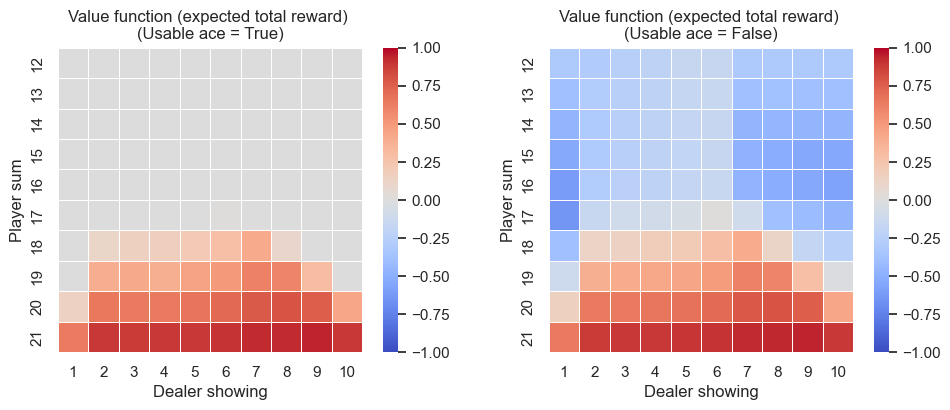

In [90]:
def v_from_q(Q):
    return {state: np.max(values) for state, values in Q.items()}


def plot_blackjack_value_func(vf):
    '''Plots a value function'''
    df = pd.DataFrame({'player_sum': [c[0]for c in vf.keys()],
                       'dealer': [c[1] for c in vf.keys()],
                       'usable_ace': [c[2] for c in vf.keys()],
                       'value': [v for v in vf.values()],
                      })
    fig, axes = plt.subplots(1,2, figsize=(10,4))
    for usable_ace, ax in zip([True, False], axes):
        vf_table = df[df['usable_ace']==usable_ace].pivot('player_sum', 'dealer', 'value')
        vf_table = vf_table.loc[12:21,]
        sns.heatmap(data=vf_table, cbar=True, linewidths=.5, cmap='coolwarm', vmin=-1, vmax=1, ax=ax)
        ax.set_title(f'Value function (expected total reward) \n(Usable ace = {usable_ace})', fontsize=12)
        ax.set_xlabel('Dealer showing')
        ax.set_ylabel('Player sum')
        ax.set_aspect('equal')
    plt.tight_layout()
    plt.show()
    
    
mc_v = v_from_q(mc_Q)
plot_blackjack_value_func(mc_v)

Vemos como esta función de valor corresponde muy bien con la de la Figura 6 del tema de métodos Montecarlo, lo que nos afirma hacer encontrado una buena solución.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 3.2</strong> (0,5 puntos)</div>

Implementar una función que imprima por pantalla la política óptima encontrada para cada estado.

¿Se consigue llegar a la política óptima?

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>NOTA:</strong> Para responder a la pregunta se recomienda implementar una función que compare la política obtenida para el conjunto de estados de la figura 2 con la política óptima e indique el número de acciones no óptimas (si las hay).</div>

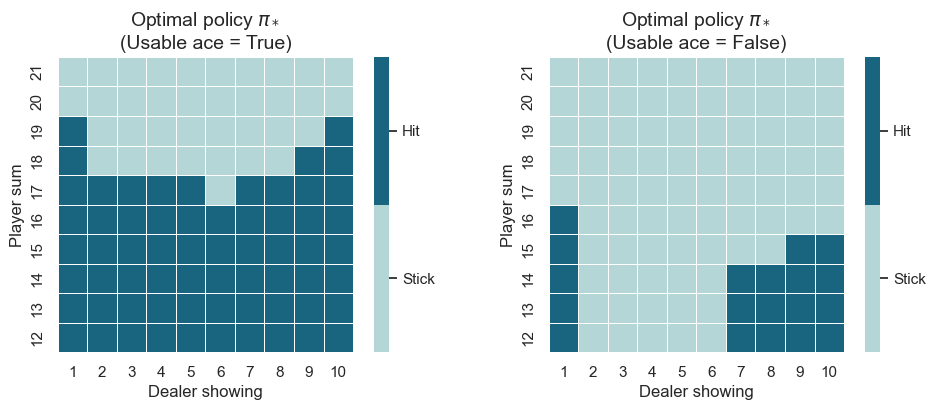

In [91]:
plot_blackjack_policy(mc_policy)

In [25]:
def policy_compare(policy1, policy2):
    return np.sum(np.array(list(policy1.values())) != 
                  np.array(list(policy2.values())))

In [26]:
errors = policy_compare(optimal_policy, mc_policy)
print("Número total de errores = {}".format(errors))

Número total de errores = 12


<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>Comentarios:</strong>
<br><br>
Si comparamos con la política óptima del apartado anterior, no hemos llegado a ella con el número de episodios simulados, pese a ser bastante alto, pero sí nos hemos acercado mucho. Además, la convergencia de este método a la política óptima está asegurada aunque sea lenta, por lo que aumentando considerablemente el número de episodios deberíamos llegar a ella. Teniendo en cuenta que tenemos 200 estados y sólo 12 de ellos han diferido respecto a la política óptima, sí que podemos decir que hemos llegado a una aproximación razonablemente buena a ésta.

En la representación de la función de valor realizada anteriormente también podemos ver que nos acercamos mucho a la representación de ésta que podemos ver en los apuntes en la Figura 6 del capítulo "Métodos de Montecarlo".
</div>


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 3.3</strong> (0,5 puntos)</div>

Utilizando el agente obtenido mediante el método de MC, simular 100.000 partidas y calcular el retorno del agente (recompensa total acumulada).

Calculad el % de victorias, derrotas y empates y compararlos con los del apartado 2. ¿A qué se deben las posibles diferencias?

In [27]:
%%time

games = 100_000
mc_results = play_games(env, mc_policy, games)
print_test_results(games, mc_results)

  0%|          | 0/100000 [00:00<?, ?it/s]

We've played 100000 games
We've won 43025 games -> 43.03%
We've lost 48291 games -> 48.29%
We've drawn 8684 games -> 8.68%
The total reward has been -5266
CPU times: total: 12.2 s
Wall time: 11.3 s


<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>Comentarios:</strong>
<br><br>
Podemos comprobar como los resultados son peores que los obtenidos con la política óptima, como podríamos esperar, ya que la política a la que hemos llegado con el método Montecarlo no ha llegado a ser la óptima. Tenemos un 43% de partidas ganadas y un 48% perdidas aproximadamente, y el retorno total ha sido de -5200 aproximadamente. Recordamos que con la política óptima hemos conseguido un retorno total de aproximadamente -4100, por lo que el retorno que temos es menor, pero no estamos tan lejos del óptimo.
</div>


### Montecarlo on-policy con $\epsilon$-greedy

No se pide en el ejercicio, pero quería realizar la comparativa utilizando un control on-policy con $\epsilon$-greedy en lugar de *exploring starts*. Para ello, he implementado el siguiente algoritmo:

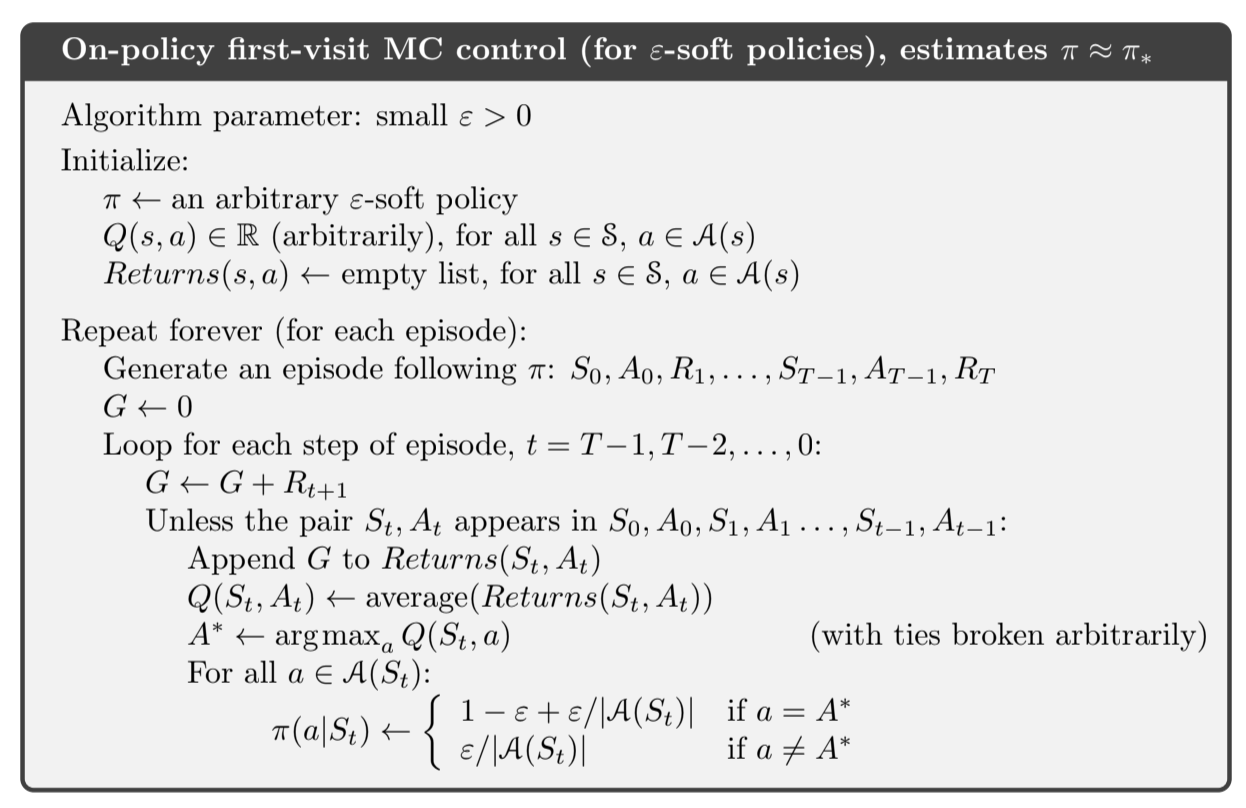

In [28]:
def gen_random_esoft_policy(env):
    '''Generates a random epsilon-soft policy'''
    n_actions = env.action_space.n
    states = create_states()
    probs = np.random.rand(len(states), n_actions)
    probs = probs / probs.sum(axis=1, keepdims=1)
    return {s : probs[i,:] for i, s in enumerate(states)}


def generate_episode_on_policy(env, policy) -> list:
    '''Generates an episode following a specified policy'''
    state = env.reset()
    episode = []
    done = False
    while not done:
        # Select action according to the policy
        probs = policy[state]
        action = np.random.choice(np.arange(len(probs)), p=probs)
        # Episode's step
        next_state, reward, done, _ = env.step(action)
        # Save current step in list
        episode.append((state, action, reward))
        # Update state
        state = next_state
    return episode


def montecarlo_control_on_policy(env, gamma, epsilon, n_episodes, pg=True):
    '''Generates the optimal policy and optimal state/action value function via Montecarlo 
    with on-policy control using epsilon-greedy'''
    n_actions = env.action_space.n # number of actions

    # Initialize pi, Q, returns
    policy = gen_random_esoft_policy(env)
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    returns = {}
    
    for ep in tqdm(range(n_episodes), disable=not pg):
        # Generate new episode without exploring starts
        episode = generate_episode_on_policy(env, policy)
        G = 0
        visited_state = set()
        # Loop over the episode's tuples
        for i, (state, action, reward) in enumerate(episode):
            # Accumulate the reward discounted by gamma
            G += gamma**(i) * reward
            if (state, action) not in visited_state:
                # Get the accumulated reward and number of visits to the state/action pair
                # If it does not exists, return 0,0
                cum_reward, cum_visits = returns.get((state, action), [0, 0])
                # Update the returns dictionary
                returns[(state, action)] = [cum_reward+G, cum_visits+1]
                # Update state/action value function
                Q[state][action] = (cum_reward + G) / (cum_visits + 1)
                # Update policy -> epsilon-greedy update with argmax
                best_action = np.argmax(Q[state])
                for a in np.arange(n_actions):
                    policy[state][a] = 1 - epsilon + epsilon/n_actions if a == best_action else epsilon/n_actions
                # Add to visited states
                visited_state.add((state, action))
    opt_policy = {k: np.argmax(v) for k, v in policy.items()}
    return Q, opt_policy

In [29]:
%%time

gamma = 1
epsilon = 0.1
n_episodes = 5_000_000
mc_op_Q, mc_op_policy = montecarlo_control_on_policy(env, gamma, epsilon, n_episodes)

  0%|          | 0/5000000 [00:00<?, ?it/s]

CPU times: total: 13min 29s
Wall time: 13min 27s


Dibujamos la política óptima enontrada con este método y la función de valor.

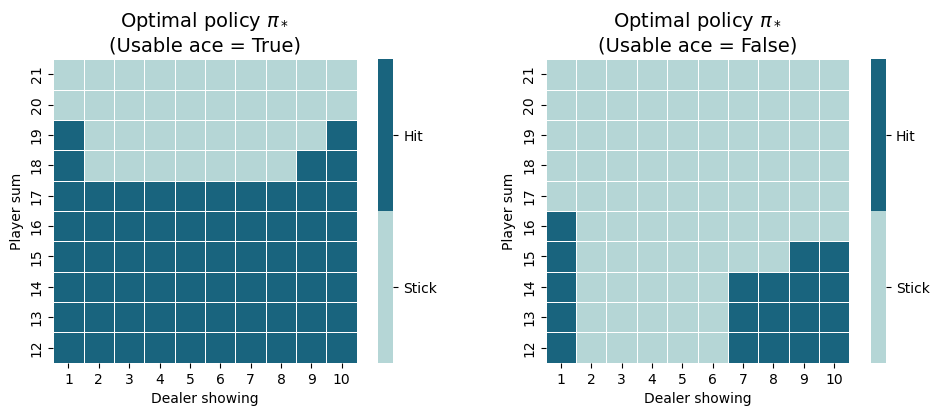

In [30]:
plot_blackjack_policy(mc_op_policy)

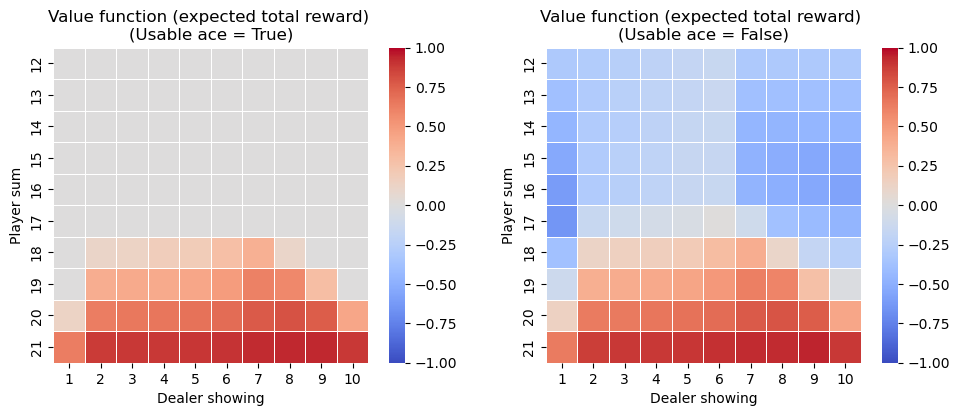

In [31]:
mc_op_v = v_from_q(mc_op_Q)
plot_blackjack_value_func(mc_op_v)

In [32]:
errors = policy_compare(optimal_policy, mc_op_policy)
print("Número total de errores = {}".format(errors))

Número total de errores = 10


Vemos que el resultado es muy similar al obtenido con *exploring starts*, tanto en la política encontrada como en la función de valor, como cabría esperar. Sin embargo, este sistema de control *on-policy* siempre está disponible, mientras que el otro en muchas ocasiones puede no ser una opción, al no ser viable empezar en cada par estado/acción.

## 4. Métodos de Diferencia Temporal (2 puntos)

El objetivo de este apartado es realizar una estimación de la política óptima mediante los métodos de Diferencia Temporal en el entorno Blackjack comentado anteriormente.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 4.1</strong> (1,5 punto)</div>

Implementar el algoritmo *SARSA* explicado en el modulo 6 "Aprendizaje por Diferencia Temporal" y ejecutarlo utilizando los siguientes parámetros (1 punto):
    
- Número de episodios = 1.000.000
- *learning rate* = 0,001
- *discount factor* = 1
- *epsilon* = 1/(nº de episodio)
- *mínimo valor de epsilon* = 0,2 

Imprimir una gráfica con la evolución del mayor error TD de cada episodio (0,5 puntos).

El algoritmo SARSA es un método de control *on-policy* para obtener la funcion de valor óptima de estado/acción $q_*$ y por lo tanto tambíén la política óptima $\pi_*$

El algoritmo que vamos a implementar es el siguiente, con la particularidad de tener una epsilon decreciente con el número de episodio, con un mínimo especificado de 0.2 para siempre mantener un nivel de exploración mínimo.

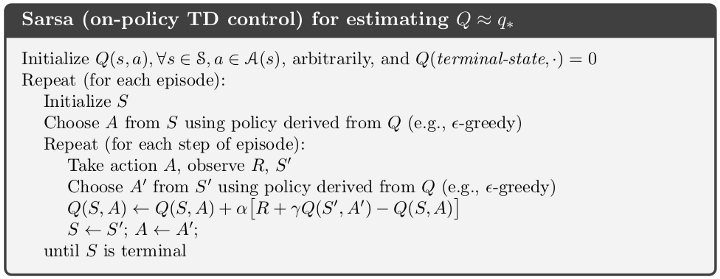

In [33]:
#Cargamos el entrono
env = bj1.BlackjackEnv()
print("Action space is {} ".format(env.action_space))
print("Observation space is {} ".format(env.observation_space))
print("Reward range is {} ".format(env.reward_range))

Action space is Discrete(2) 
Observation space is Tuple(Discrete(32), Discrete(11), Discrete(2)) 
Reward range is (-inf, inf) 


In [34]:
def select_action_e_greedy(Q, state, epsilon):
    '''Function to choose the next action with epsilon-greedy'''
    if np.random.uniform(0, 1) < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(Q[state])
    return action


def td_sarsa(env, lr=0.01, gamma=1, epsilon_min=0.1, n_episodes=1e6, pg=True):
    '''Generates the optimal policy and optimal state/action value function via Temporal Difference with SARSA control'''
    n_actions = env.action_space.n # number of actions
    
    #Initializing the Q-value, reward and TD errors
    Q = defaultdict(lambda: np.zeros(n_actions))
    reward=0
    td_errors = []
    
    for ep in tqdm(range(n_episodes), disable=not pg):
        # Calculate epsilon for the current episode. We have a decaying epsilon with a minimun.
        epsilon = np.max([1/(ep+1), epsilon_min])
        # Reset environment
        s = env.reset()
        # Choose action according to state with epsilon-greedy
        a = select_action_e_greedy(Q, s, epsilon)
        done = False
        ep_max_error = 0
        while not done:
            # Getting the next state
            s_, reward, done, info = env.step(a)
            # Choose the next action with epsilon-greedy
            a_ = select_action_e_greedy(Q, s_, epsilon)
            # Update Q value according to SARSA control for each time step
            # 𝑄(𝑆𝑡,𝐴𝑡)<-𝑄(𝑆𝑡,𝐴𝑡)+𝛼[𝑅𝑡+1+𝛾𝑄(𝑆𝑡+1,𝐴𝑡+1)−𝑄(𝑆𝑡,𝐴𝑡)]
            old_q = Q[s][a]
            if done: # If we reach terminal state, set 𝑄(𝑆𝑡+1,𝐴𝑡+1) to zero, so TD target equals to inmmediate reward
                td_target = reward
            else: # Otherwise, TD_target <-𝑅𝑡+1+𝛾𝑄(𝑆𝑡+1,𝐴𝑡+1)
                td_target= reward + gamma * Q[s_][a_]
            td_error = td_target - Q[s][a]
            Q[s][a] += lr * td_error
            # Update state/action
            s, a = s_, a_
            # Error
            ep_max_error = max(ep_max_error, np.abs(Q[s][a]-old_q))
        td_errors.append(ep_max_error)
    policy = {s:np.argmax(Q[s]) for s in create_states()}
    return Q, policy, td_errors

In [35]:
%%time

# Parameter definition
n_episodes = 1_000_000
lr = 0.001 # Learning rate
gamma = 1 # Discount factor
epsion_min = 0.2

Q_sarsa, sarsa_policy, td_errors = td_sarsa(env, lr, gamma, epsion_min, n_episodes)

  0%|          | 0/1000000 [00:00<?, ?it/s]

CPU times: total: 2min 40s
Wall time: 2min 28s


Representamos a continuación la evolución del error TD máximo en cada episodio en función de que éstos se van produciendo. Representamos gráficamente sólo uno de cada 1000 episodios para poder ver algo con un número tan alto de episodios como tenemos.

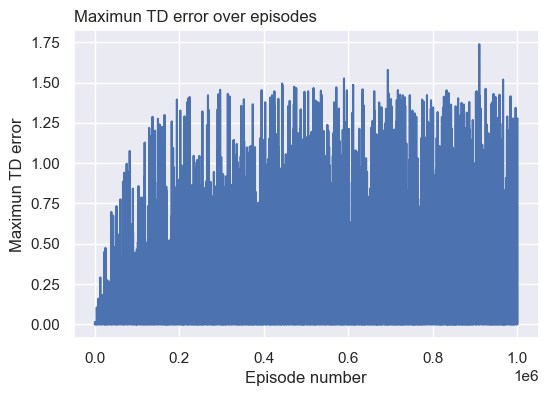

In [36]:
sns.set_theme()
fig, ax = plt.subplots(figsize=(6,4))
y = [err for i, err in enumerate(td_errors) if not i%100]
x = np.array(range(len(y)))*100
sns.lineplot(x=x, y=y, ax=ax)
ax.set_title('Maximun TD error over episodes', loc='left')
ax.set_xlabel('Episode number')
ax.set_ylabel('Maximun TD error')
plt.show()

Representamos la función de valor a partir de la q encontrada tras el entrenamiento.

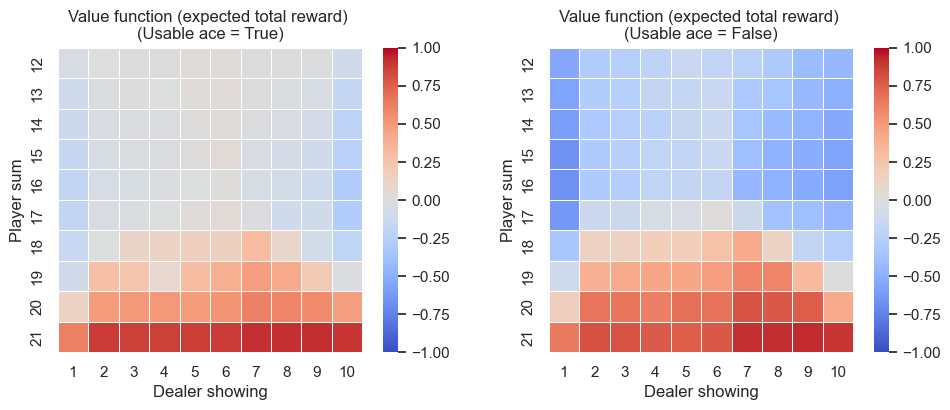

In [37]:
sarsa_v = v_from_q(Q_sarsa)
plot_blackjack_value_func(sarsa_v)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 4.2</strong> (0,25 puntos)</div>

Implementar una función que imprima por pantalla la política óptima encontrada para cada estado.

¿Se consigue llegar a la política óptima?

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>NOTA:</strong> Para responder a la pregunta se recomienda implementar una función que compare la política obtenida para el conjunto de estados de la figura 2 con la política óptima e indique el número de acciones no óptimas (si las hay).</div>

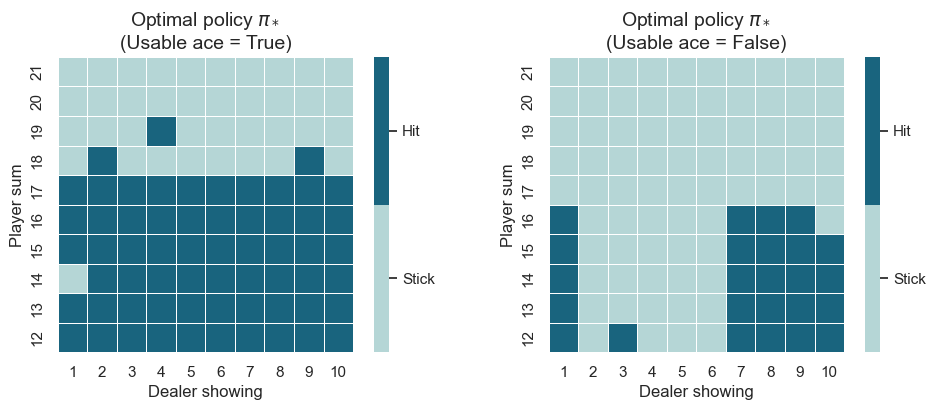

In [38]:
plot_blackjack_policy(sarsa_policy)

In [39]:
errors = policy_compare(optimal_policy, sarsa_policy)
print("Número total de errores = {}".format(errors))

Número total de errores = 7


<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>Comentarios:</strong>
<br><br>
    
Podemos ver que con el entrenamiento que hemos realizado no llegamos a la política óptima, pero nos quedamos muy cerca, con sólo 7 diferencias en 7 de los 200 estados. La solución no dista mucho de la encontrada con el método Montecarlo (aunque evidentemente no es idéntica), eso si, con un número de episodios de entrenamiento mucho menor, y por lo tanto un tiempo de cómputo mucho menor. Tambíen hemos representado la función de valor para todos los estados y tambén vemos que tiene un valor correcto.

</div>


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 4.3</strong> (0,25 puntos)</div>

Utilizando el agente obtenido mediante el método de SARSA, simular 100.000 partidas y calcular el retorno del agente (recompensa total acumulada).

¿Se aprecian grandes diferencias en los porcentajes obtenidos? ¿A qué es debido?

In [40]:
%%time

games = 100_000
sarsa_results = play_games(env, sarsa_policy, games)
print_test_results(games, sarsa_results)

  0%|          | 0/100000 [00:00<?, ?it/s]

We've played 100000 games
We've won 42952 games -> 42.95%
We've lost 47908 games -> 47.91%
We've drawn 9140 games -> 9.14%
The total reward has been -4956
CPU times: total: 12.5 s
Wall time: 11.4 s


<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>Comentarios:</strong>
<br><br>
Con los parámetros que hemos definido, obtenemos con SARSA unos resultados bastante similares a los optenidos con Montecarlo, algo lógico teniendo en cuenta que la política a la que hemos llegado en ambos casos ha sido cercana a la óptima. La recompensa total tras 100.000 partidas es de -5000 aproximadamente, algo mejor que lo obtenido con Montecarlo (-5200 aprox), y el porcentaje de partidas aganadas ha sido del 43%, prácticamente lo mismo que lo obtenido con la política obtenida con Montecarlo. Por lo tanto, podemos ver como con ambos métodos hemos llegado a suluciones similares, que además se aproximan mucho a la óptima.

</div>


## 5. Comparativa de los algoritmos (2 puntos)

En este apartado realizaremos una comparativa entre los algoritmos.

Compararemos el comportamiento de los algoritmos al modificar los valores del factor de descuento, el *learning rate* (en el caso del método SARSA) y el numero de episodios.

Para cada ejercicio se deben mostrar y justificar los resultados.

<u>NOTA</u>: se recomienda realizar varias veces las simulaciones en cada ejercicio, ya que éstas son aleatorias, y comentar el resultado más frecuente, o una media de estos.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 5.1-Influencia del número de episodios</strong> (1 punto)</div> 

Realizar un estudio cambiando el número de episodios en cada uno de los 2 algoritmos:
- Entrenar cada algoritmo varias veces con 100.000, 1.000.0000 y 5.000.000 de episodios y promediar los resultados
- Indicar cómo influye el número de episodios en la convergencia de cada algoritmo, calculando el número de estados en que la política difiere de la óptima así como la media del retorno obtenido al jugar 100.000 partidas después de cada entrenamiento.

In [41]:
#### Montecarlo ####

def test_training_ep_mc(env, n_rep_prod, n_episodes_list, n_games_test, gamma):
    results = []
    for n_episodes in tqdm(n_episodes_list, position=0, desc='Number of episodes'):
        for i in tqdm(range(n_rep_prod), position=1, desc="Iteration", leave=False):
            Q, policy = montecarlo_control_es(env, gamma, n_episodes, pg=False)
            res_play = play_games(env, policy, n_games_test, pg=False)
            policy_errors = policy_compare(optimal_policy, policy)
            results.append((n_episodes, i, policy_errors, *res_play))
    df = pd.DataFrame(results, columns=['n_episodes', 'i', 'policy_errors', 't_reward', 't_wins', 't_losses', 't_draws']) 
    # Wins, losses and draws in percentage
    df['wins_per'] = df['t_wins'] / n_games_test * 100
    df['losses_per'] = df['t_losses'] / n_games_test * 100
    df['draws_per'] = df['t_draws'] / n_games_test * 100
    return df

In [42]:
%%time

n_rep_prod = 10
n_episodes_list = [100_000, 1_000_000, 5_000_000]
n_games_test = 100_000
gamma = 1

df_mc = test_training_ep_mc(env, n_rep_prod, n_episodes_list, n_games_test, gamma)

Number of episodes:   0%|          | 0/3 [00:00<?, ?it/s]

Iteration:   0%|          | 0/10 [00:00<?, ?it/s]

Iteration:   0%|          | 0/10 [00:00<?, ?it/s]

Iteration:   0%|          | 0/10 [00:00<?, ?it/s]

CPU times: total: 1h 57min 38s
Wall time: 1h 57min 33s


In [43]:
def plot_test_param(df, param):
    sns.set_theme()
    fig, axes = plt.subplots(2, 2, figsize=(10,6), sharex=True)
    for ax, col in zip(axes.flatten(), ['t_reward', 'policy_errors', 'wins_per', 'losses_per']):
        sns.pointplot(x=param, y=col, data=df, ax=ax)
        ax.set_xlabel('')
        ax.set_title(f'{col} vs. {param}')
    plt.tight_layout()
    plt.show()

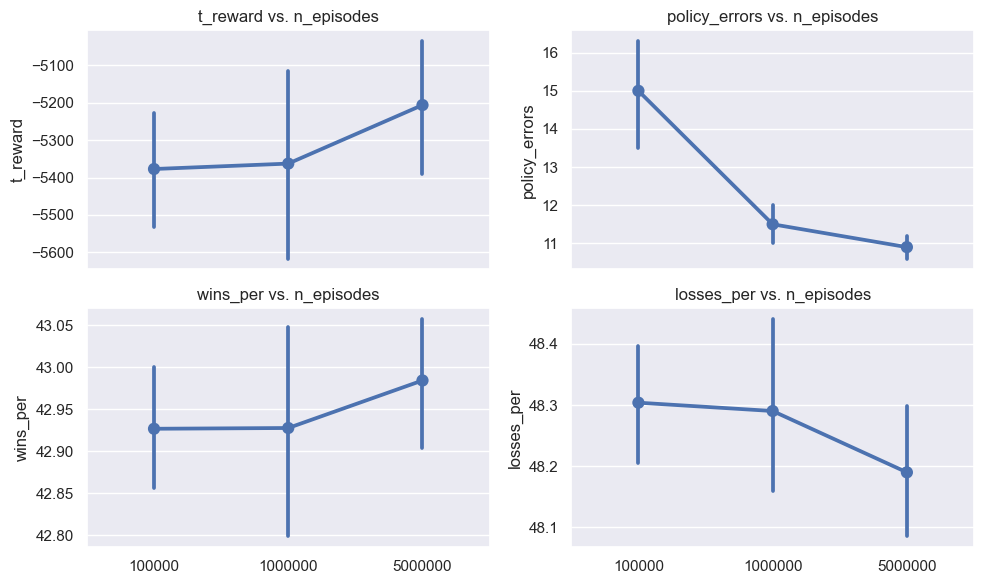

In [44]:
plot_test_param(df_mc, 'n_episodes')

In [45]:
#### SARSA ####

def test_training_ep_sarsa(env, n_rep_prod, n_episodes_list, n_games_test, gamma, lr, epsion_min):
    results = []
    for n_episodes in tqdm(n_episodes_list, position=0, desc='Number of episodes'):
        for i in tqdm(range(n_rep_prod), position=1, desc="Iteration", leave=False):
            Q, policy, td_errors = td_sarsa(env, lr, gamma, epsion_min, n_episodes, pg=False)
            res_play = play_games(env, policy, n_games_test, pg=False)
            policy_errors = policy_compare(optimal_policy, policy)
            results.append((n_episodes, i, policy_errors, *res_play))
    df = pd.DataFrame(results, columns=['n_episodes', 'i', 'policy_errors', 't_reward', 't_wins', 't_losses', 't_draws']) 
    # Wins, losses and draws in percentage
    df['wins_per'] = df['t_wins'] / n_games_test * 100
    df['losses_per'] = df['t_losses'] / n_games_test * 100
    df['draws_per'] = df['t_draws'] / n_games_test * 100
    return df

In [46]:
%%time

# Parameter definition
n_rep_prod = 10
n_episodes_list = [100_000, 1_000_000, 5_000_000]
n_games_test = 100_000
lr = 0.001 # Learning rate
gamma = 1 # Discount factor
epsion_min = 0.2

df_sarsa = test_training_ep_sarsa(env, n_rep_prod, n_episodes_list, n_games_test, gamma, lr, epsion_min)

Number of episodes:   0%|          | 0/3 [00:00<?, ?it/s]

Iteration:   0%|          | 0/10 [00:00<?, ?it/s]

Iteration:   0%|          | 0/10 [00:00<?, ?it/s]

Iteration:   0%|          | 0/10 [00:00<?, ?it/s]

CPU times: total: 2h 20min 11s
Wall time: 2h 20min 8s


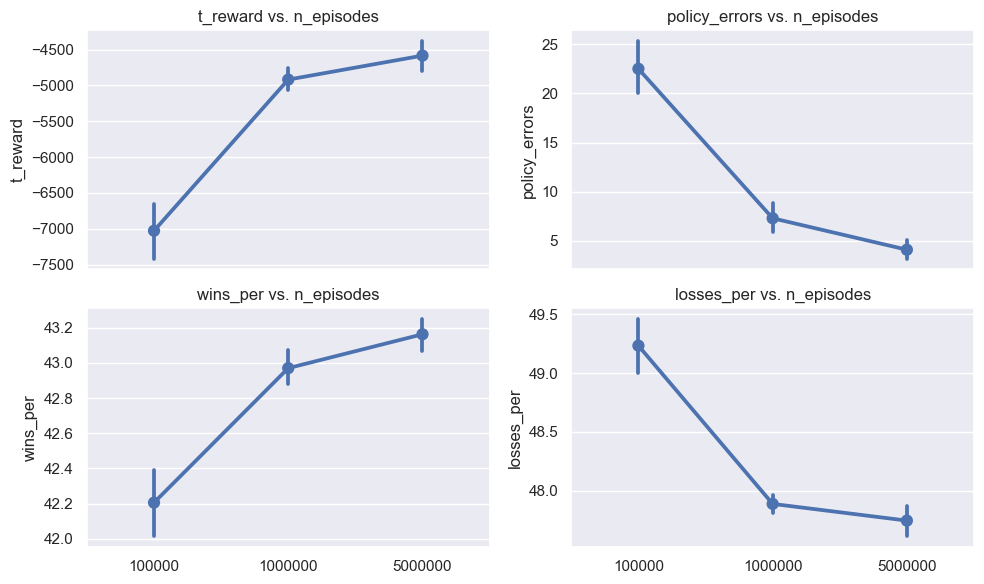

In [47]:
plot_test_param(df_sarsa, 'n_episodes')

<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>CONCLUSIONES:</strong>
<br><br>

    
Algoritmo MC:  
    
Vemos con el algoritmo Montecarlo como las variaciones que observamos con el número de episodios no es muy alta si nos fijamos en sus valores, estando estos entre los -5400 y -5200 en media, pero sí observamos cierta mejora en el caso de entrenar con el mayor número de episodios (5.000.000). La recompensa total acumulada más alta se optiene con este número de episodios y está an el rango de los -4500, como ya habíamos visto en la simulación inicial. Por supuesto, la mejora en el retorno viene derivada de una política que es más similar a la óptima, con sólo diferencias con la óptima en 10 estados de media. También es interesante darse cuenta de que la varianza en los errores con la política óptima se reduce con el número de episodios. Es decir, no sólo nos estamos acercando a esa política óptima, sino que la confianza en ella también se cada vez más alta.
    
Algoritmo SARSA: 
    
Podemos ver claramente en la primera gráfica como con el algoritmo SARSA también tenemos un aumento de la recompensa acumulada total cuando aumentamos el número de episodios de entrenamiento, especialmente cuando pasamos de 100.000 a 1.000.000 debido a que la política a la que llegamos tiene menos discrepancias con la óptima, como puede verse a su derecha. Tal y como hemos visto anteriormente, SARSA nos produce una convergencia más rápida y a una solución más óptima, llegando a un retorno promedio de -4500 de media con 5.0000.000 episodios. Además, con este número de episodios vemos como la coincidencia con la política ótima es excelente, llegando a tener sólo 4 diferencia en promedio con ésta. Lo mismo ocurre con el resultado de las partidas, que aumentan las ganadas y disminuyen las perdidas cuando el número de episodios se incrementa. 

</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 5.2-Influencia del factor de descuento</strong> (0,5 puntos)</div> 

Ejecutar los 2 algoritmos con *discount factor*=0.1 y el resto de parámetros iguales que en los ejercicios 3 y 4. Describir los cambios en la política óptima, comparando el resultado obtenido con el resultado de los ejercicios 3 y 4 (*discount factor*=1).


  0%|          | 0/5000000 [00:00<?, ?it/s]

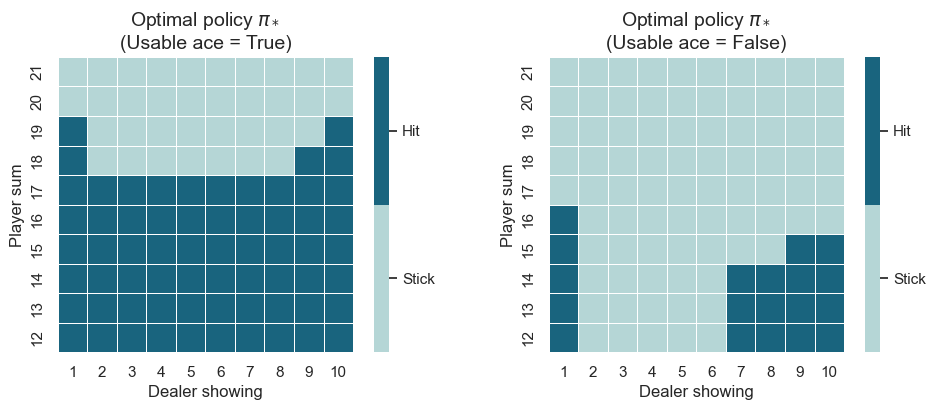

Número total de errores = 10


In [48]:
######################## Montecarlo ###########################

# Parameter definition
n_episodes = 5_000_000
gamma = 0.1

# Montecarlo algorithm
mc_Q_gamma01, mc_policy_gamma01 = montecarlo_control_es(env, gamma, n_episodes)

# Plot policy
plot_blackjack_policy(mc_policy_gamma01)

# Errors
errors = policy_compare(optimal_policy, mc_policy_gamma01)
print("Número total de errores = {}".format(errors))

  0%|          | 0/1000000 [00:00<?, ?it/s]

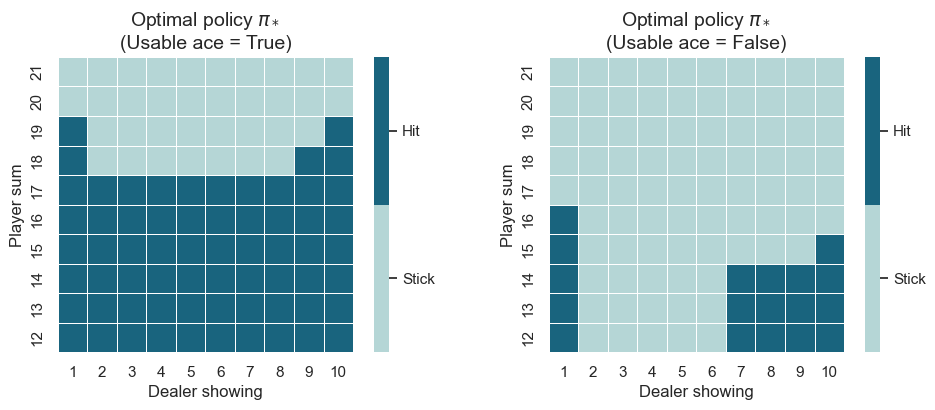

Número total de errores = 11


In [49]:
######################## SARSA ###########################

# Parameter definition
n_episodes = 1_000_000
gamma = 0.1 
lr = 0.001
epsion_min = 0.2

# SARSA algorithm
Q_sarsa_gamma01, sarsa_policy_gamma01, td_errors_gamma01 = td_sarsa(env, lr, gamma, epsion_min, n_episodes)

# Plot policy
plot_blackjack_policy(sarsa_policy_gamma01)

# Errors
errors = policy_compare(optimal_policy, sarsa_policy_gamma01)
print("Número total de errores = {}".format(errors))

<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>CONCLUSIONES:</strong>
<br>
    
El factor descuento que se establece en este caso es extraordinariamente bajo ($\gamma=0.1$). Eso quiere decir que se verán las recompensas en un horizonte muy corto, y por lo tanto la recompensa inmmediata será de mucha más relevancia que las futuras. Sin embargo, en este caso de blackjack sólamente tenemos recompensas al final del episodio, y nunca en otro momento, y además el MDP es de una sóla dirección, es decir, nunca podemos retroceder a un estado anterior. Esto hace que optimizar un caso con un factor descuento alto o bajo al final derive en una solución similar, y eso es lo que ha ocurrido en este caso, donde pese a haber reducido mucho el factor descuento, la solución es muy similar a la que ya teníamos con $\gamma=1$.
    
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 5.3-Influencia del learning rate</strong> (0,5 puntos)</div> 

Ejecutar el algoritmo de *SARSA* con los siguientes valores de *learning rate*: 0.001, 0.01, 0.1 y 0.9. Analizar las diferencias con los resultados obtenidos en la pregunta 4 en término de número de errores respecto a la política óptima y de recompensa acumulada cada 100.000 episodios jugados.

In [50]:
######################## SOLUCIÓN ###########################

def test_lr_sarsa(env, n_rep_prod, n_episodes, n_games_test, gamma, lr_list, epsion_min):
    results = []
    for lr in tqdm(lr_list, position=0, desc='Number of episodes'):
        for i in tqdm(range(n_rep_prod), position=1, desc="Iteration", leave=False):
            Q_sarsa, sarsa_policy, td_errors = td_sarsa(env, lr, gamma, epsion_min, n_episodes, pg=False)
            res_play = play_games(env, sarsa_policy, n_games_test, pg=False)
            policy_errors = policy_compare(optimal_policy, sarsa_policy)
            results.append((lr, i, policy_errors, *res_play))
    df = pd.DataFrame(results, columns=['lr', 'i', 'policy_errors', 't_reward', 't_wins', 't_losses', 't_draws']) 
    # Wins, losses and draws in percentage
    df['wins_per'] = df['t_wins'] / n_games_test * 100
    df['losses_per'] = df['t_losses'] / n_games_test * 100
    df['draws_per'] = df['t_draws'] / n_games_test * 100
    return df

In [51]:
%%time

# Parameter definition
n_rep_prod = 10 #Number of runs to average
n_episodes = 1_000_000 
gamma = 1
lr_list = [0.001, 0.01, 0.1, 0.9]
epsion_min = 0.2
n_games_test = 100_000

df_sarsa_lr_test = test_lr_sarsa(env, n_rep_prod, n_episodes, n_games_test, gamma, lr_list, epsion_min)

Number of episodes:   0%|          | 0/4 [00:00<?, ?it/s]

Iteration:   0%|          | 0/10 [00:00<?, ?it/s]

Iteration:   0%|          | 0/10 [00:00<?, ?it/s]

Iteration:   0%|          | 0/10 [00:00<?, ?it/s]

Iteration:   0%|          | 0/10 [00:00<?, ?it/s]

CPU times: total: 1h 35min 32s
Wall time: 1h 35min 27s


In [54]:
df_sarsa_lr_test.head()

,lr,i,policy_errors,t_reward,t_wins,t_losses,t_draws,wins_per,losses_per,draws_per
0,0.001,0,4,-4795,42939,47734,9327,42.939,47.734,9.327
1,0.001,1,12,-5210,42788,47998,9214,42.788,47.998,9.214
2,0.001,2,6,-4885,43007,47892,9101,43.007,47.892,9.101
3,0.001,3,6,-4871,43030,47901,9069,43.030,47.901,9.069
4,0.001,4,10,-4820,42926,47746,9328,42.926,47.746,9.328


Representamos los resultados obtenidos.

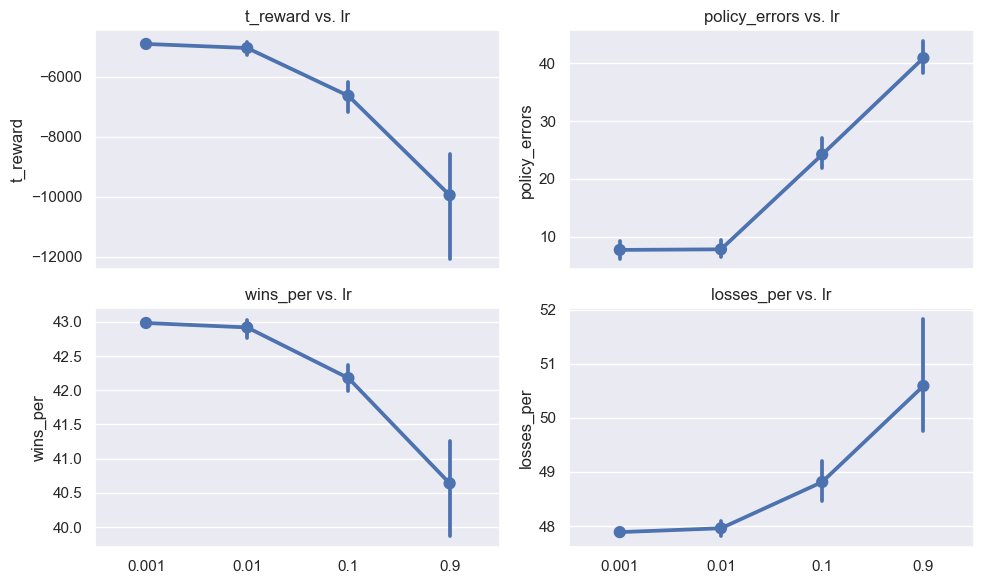

In [53]:
plot_test_param(df_sarsa_lr_test, 'lr')

<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>CONCLUSIONES:</strong>
<br>
    
En la primera gráfica podemos ver claramente como cuando aumentamos mucho el learning rate la recompensa total acumulada desciende, debido a que la diferencia con la política óptima es cada vez mayor, como se puede ver a su derecha. Por otro parte, y de igual manera, el porcentaje de partidas ganadas desciende y el de perdidas asciende debido a que nos alejamos de la política óptima. Estos cambios son mucho más graves en el caso de un learning rate de 0.9, un valor muy alto, que no permite al algoritmo converger a una política razonablemnete cercana a la óptima, como sí ocurre en los otros casos. Esto tiene sentido teniendo en cuenta que la convergencia en los métrodos TD(0) está asegurada si "el paso es constante y su dimensión es suficientemente pequeña", condición que es evidente que no ocurre en el caso último donde el learning rate es de 0.9. Si tuviésemos un learning rate decreciente con el número de episodios, el algoritmo siempre convergería, independientemente del learning rate con el que se comenzase. Como no es el caso, hay que tener cuidado con la elección de esta parámetro para que converja a la $q_*$ y $\pi_*$. Además, se puede observar que con el aumento del learning rate no sólamente aumentan los errores y disminuye la recompensa, sino que la varianza entre diferentes ejecuciones completas aumenta considerablemente. En este caso, el learning rate menor ($\alpha=0.001$) es el que ofrece unos resultados mejores.
<br>
</div>

# Bibliografía:

https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html

https://seaborn.pydata.org/generated/seaborn.heatmap.html

https://medium.com/data-science-in-your-pocket/monte-carlo-for-reinforcement-learning-with-example-1754439dd628

https://medium.com/@aminakeldibek/monte-carlo-control-6e3b70f173a8

https://ai.stackexchange.com/questions/24450/intuitively-how-does-it-make-sense-to-take-an-action-a-when-the-environment

http://datamachines.xyz/2021/12/17/hands-on-reinforcement-learning-course-part-3-sarsa/

https://medium.com/swlh/states-observation-and-action-spaces-in-reinforcement-learning-569a30a8d2a1